In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

num_classes = 7 # Number of classes to classify
img_size = (64, 64) # Size of input image
batch_size = 32 # Is always 2^n
data_dir = "Best_Emotion/CK+48" # Input image directory

# data generator with image augmentation to load augmented data from directory
datagen = ImageDataGenerator(
    rescale=1./255, # Rescales images to [0 - 1] range which standarizes the images to a shorter range
    shear_range=0.2, # Randomly rotates images by about 10% by its horizontal axis (10% left, 10% right)
    zoom_range=0.2, # Randomly zooms images by about 10% (10% zoom in, 10% zoom out)
    horizontal_flip=True, # Randomly flips the horizontal axis of each image along with its vertical axis
    validation_split=0.2  # 80% for training, 20% for validation
)

# Load and preprocess the training set
train_generator = datagen.flow_from_directory(
    data_dir, # Path of the directory
    target_size=img_size, # Target image size
    batch_size=batch_size,  # Batch size, number of images to be produced per iteration
    class_mode='categorical', # multi-classes
    subset='training' # training so that it gives 80% of the images to this subset
)

# Load and preprocess the validation set
validation_generator = datagen.flow_from_directory(
    data_dir, # Path of the directory
    target_size=img_size, # Target image size
    batch_size=batch_size, # Batch size, number of images to be produced per iteration
    class_mode='categorical', # multi-classes
    subset='validation' # validation so that it gives 20% of the images to this subset
)

# Calculate class weights to handle imbalance
class_weights = {} # Dictionary where we store classes' weights
total_samples = train_generator.samples # Total images in training sample
for class_index in range(num_classes): # For loop to calculate weight of all classes one by one
    class_count = sum(train_generator.classes == class_index) # Counts num of images belonging to the class we're calculating the weight of
    class_weight = total_samples / (num_classes * class_count) # Calculating the inverse of the % of the image inside total samples so that weight is inversely propotional to its amount
    class_weights[class_index] = class_weight # Added calculated weight in the dictionary

# Build the sequential model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model with class weights
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define a ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint("best_model", monitor='val_accuracy', save_best_only=True, mode='max')

# Train the model with class weights
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=[checkpoint]
)

Found 788 images belonging to 7 classes.
Found 193 images belonging to 7 classes.
Epoch 1/100
25/25 [==============================] - ETA: 0s - loss: 1.9563 - accuracy: 0.1904INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


25/25 [==============================] - 6s 178ms/step - loss: 1.9563 - accuracy: 0.1904 - val_loss: 1.9229 - val_accuracy: 0.2539
Epoch 2/100
25/25 [==============================] - ETA: 0s - loss: 1.9100 - accuracy: 0.3376INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


25/25 [==============================] - 4s 166ms/step - loss: 1.9100 - accuracy: 0.3376 - val_loss: 1.7067 - val_accuracy: 0.3938
Epoch 3/100
25/25 [==============================] - ETA: 0s - loss: 1.6836 - accuracy: 0.4645INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


25/25 [==============================] - 4s 171ms/step - loss: 1.6836 - accuracy: 0.4645 - val_loss: 1.3018 - val_accuracy: 0.5337
Epoch 4/100
25/25 [==============================] - ETA: 0s - loss: 1.3917 - accuracy: 0.5431INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


25/25 [==============================] - 4s 171ms/step - loss: 1.3917 - accuracy: 0.5431 - val_loss: 1.0777 - val_accuracy: 0.6114
Epoch 5/100
25/25 [==============================] - 3s 135ms/step - loss: 1.2494 - accuracy: 0.5761 - val_loss: 1.0430 - val_accuracy: 0.6062
Epoch 6/100
25/25 [==============================] - ETA: 0s - loss: 1.1492 - accuracy: 0.6358INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


25/25 [==============================] - 5s 188ms/step - loss: 1.1492 - accuracy: 0.6358 - val_loss: 0.8280 - val_accuracy: 0.7306
Epoch 7/100
25/25 [==============================] - ETA: 0s - loss: 1.0971 - accuracy: 0.6662INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


25/25 [==============================] - 4s 176ms/step - loss: 1.0971 - accuracy: 0.6662 - val_loss: 0.8136 - val_accuracy: 0.7409
Epoch 8/100
25/25 [==============================] - ETA: 0s - loss: 0.8702 - accuracy: 0.7360INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


25/25 [==============================] - 4s 173ms/step - loss: 0.8702 - accuracy: 0.7360 - val_loss: 0.6832 - val_accuracy: 0.7876
Epoch 9/100
25/25 [==============================] - 3s 135ms/step - loss: 0.7885 - accuracy: 0.7475 - val_loss: 0.6387 - val_accuracy: 0.7565
Epoch 10/100
25/25 [==============================] - ETA: 0s - loss: 0.8038 - accuracy: 0.7475INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


25/25 [==============================] - 5s 182ms/step - loss: 0.8038 - accuracy: 0.7475 - val_loss: 0.5876 - val_accuracy: 0.7979
Epoch 11/100
25/25 [==============================] - 3s 132ms/step - loss: 0.7421 - accuracy: 0.7602 - val_loss: 0.6001 - val_accuracy: 0.7513
Epoch 12/100
25/25 [==============================] - ETA: 0s - loss: 0.6999 - accuracy: 0.7754INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


25/25 [==============================] - 4s 174ms/step - loss: 0.6999 - accuracy: 0.7754 - val_loss: 0.6878 - val_accuracy: 0.8031
Epoch 13/100
25/25 [==============================] - ETA: 0s - loss: 0.6493 - accuracy: 0.7957INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


25/25 [==============================] - 4s 164ms/step - loss: 0.6493 - accuracy: 0.7957 - val_loss: 0.4915 - val_accuracy: 0.8290
Epoch 14/100
25/25 [==============================] - 3s 116ms/step - loss: 0.5294 - accuracy: 0.8312 - val_loss: 0.6096 - val_accuracy: 0.8290
Epoch 15/100
25/25 [==============================] - ETA: 0s - loss: 0.5899 - accuracy: 0.8223INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


25/25 [==============================] - 4s 164ms/step - loss: 0.5899 - accuracy: 0.8223 - val_loss: 0.4235 - val_accuracy: 0.8601
Epoch 16/100
25/25 [==============================] - 3s 122ms/step - loss: 0.4942 - accuracy: 0.8388 - val_loss: 0.4702 - val_accuracy: 0.8446
Epoch 17/100
25/25 [==============================] - ETA: 0s - loss: 0.5236 - accuracy: 0.8211INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


25/25 [==============================] - 4s 165ms/step - loss: 0.5236 - accuracy: 0.8211 - val_loss: 0.3766 - val_accuracy: 0.8912
Epoch 18/100
25/25 [==============================] - 3s 128ms/step - loss: 0.4561 - accuracy: 0.8553 - val_loss: 0.4322 - val_accuracy: 0.8705
Epoch 19/100
25/25 [==============================] - 3s 137ms/step - loss: 0.4340 - accuracy: 0.8668 - val_loss: 0.3983 - val_accuracy: 0.8912
Epoch 20/100
25/25 [==============================] - 3s 122ms/step - loss: 0.4326 - accuracy: 0.8477 - val_loss: 0.3878 - val_accuracy: 0.8653
Epoch 21/100
25/25 [==============================] - 3s 115ms/step - loss: 0.4333 - accuracy: 0.8477 - val_loss: 0.4267 - val_accuracy: 0.8860
Epoch 22/100
25/25 [==============================] - 3s 122ms/step - loss: 0.3823 - accuracy: 0.8871 - val_loss: 0.4233 - val_accuracy: 0.8549
Epoch 23/100
25/25 [==============================] - 3s 124ms/step - loss: 0.4167 - accuracy: 0.8807 - val_loss: 0.4191 - val_accuracy: 0.8238
Epoch

INFO:tensorflow:Assets written to: best_model\assets


25/25 [==============================] - 4s 167ms/step - loss: 0.3834 - accuracy: 0.8731 - val_loss: 0.3016 - val_accuracy: 0.9223
Epoch 30/100
25/25 [==============================] - 3s 119ms/step - loss: 0.2941 - accuracy: 0.9137 - val_loss: 0.3071 - val_accuracy: 0.8756
Epoch 31/100
25/25 [==============================] - 3s 117ms/step - loss: 0.2402 - accuracy: 0.9277 - val_loss: 0.3075 - val_accuracy: 0.9016
Epoch 32/100
25/25 [==============================] - 3s 117ms/step - loss: 0.3118 - accuracy: 0.9137 - val_loss: 0.4318 - val_accuracy: 0.8446
Epoch 33/100
25/25 [==============================] - 3s 121ms/step - loss: 0.3038 - accuracy: 0.8997 - val_loss: 0.2856 - val_accuracy: 0.8912
Epoch 34/100
25/25 [==============================] - 3s 116ms/step - loss: 0.2665 - accuracy: 0.9124 - val_loss: 0.3328 - val_accuracy: 0.8860
Epoch 35/100
25/25 [==============================] - 3s 120ms/step - loss: 0.2658 - accuracy: 0.9137 - val_loss: 0.3240 - val_accuracy: 0.8860
Epoch

INFO:tensorflow:Assets written to: best_model\assets


25/25 [==============================] - 4s 159ms/step - loss: 0.1783 - accuracy: 0.9454 - val_loss: 0.3068 - val_accuracy: 0.9275
Epoch 45/100
25/25 [==============================] - 3s 113ms/step - loss: 0.1822 - accuracy: 0.9454 - val_loss: 0.2536 - val_accuracy: 0.9275
Epoch 46/100
25/25 [==============================] - 3s 114ms/step - loss: 0.2020 - accuracy: 0.9315 - val_loss: 0.4474 - val_accuracy: 0.8808
Epoch 47/100
25/25 [==============================] - 3s 114ms/step - loss: 0.1821 - accuracy: 0.9391 - val_loss: 0.3533 - val_accuracy: 0.8860
Epoch 48/100
25/25 [==============================] - 3s 123ms/step - loss: 0.1615 - accuracy: 0.9543 - val_loss: 0.3293 - val_accuracy: 0.8808
Epoch 49/100
25/25 [==============================] - 3s 121ms/step - loss: 0.1523 - accuracy: 0.9492 - val_loss: 0.4340 - val_accuracy: 0.8912
Epoch 50/100
25/25 [==============================] - 3s 123ms/step - loss: 0.1616 - accuracy: 0.9518 - val_loss: 0.3324 - val_accuracy: 0.8964
Epoch

INFO:tensorflow:Assets written to: best_model\assets


25/25 [==============================] - 5s 186ms/step - loss: 0.1356 - accuracy: 0.9581 - val_loss: 0.2605 - val_accuracy: 0.9378
Epoch 72/100
25/25 [==============================] - 3s 128ms/step - loss: 0.1009 - accuracy: 0.9670 - val_loss: 0.4047 - val_accuracy: 0.9223
Epoch 73/100
25/25 [==============================] - 3s 129ms/step - loss: 0.1050 - accuracy: 0.9581 - val_loss: 0.4038 - val_accuracy: 0.8964
Epoch 74/100
25/25 [==============================] - 3s 130ms/step - loss: 0.0669 - accuracy: 0.9784 - val_loss: 0.4210 - val_accuracy: 0.9067
Epoch 75/100
25/25 [==============================] - 4s 140ms/step - loss: 0.1406 - accuracy: 0.9556 - val_loss: 0.2459 - val_accuracy: 0.9067
Epoch 76/100
25/25 [==============================] - 3s 128ms/step - loss: 0.1138 - accuracy: 0.9683 - val_loss: 0.2985 - val_accuracy: 0.9275
Epoch 77/100
25/25 [==============================] - 3s 129ms/step - loss: 0.0793 - accuracy: 0.9695 - val_loss: 0.3063 - val_accuracy: 0.9223
Epoch

In [6]:
import pickle
filename = 'Finalized_model/Final_model_97.sav'
pickle.dump(model, open(filename, 'wb'))

In [6]:
import pickle
loaded_model = pickle.load(open("Finalized_model/Final_model_97.sav", 'rb'))

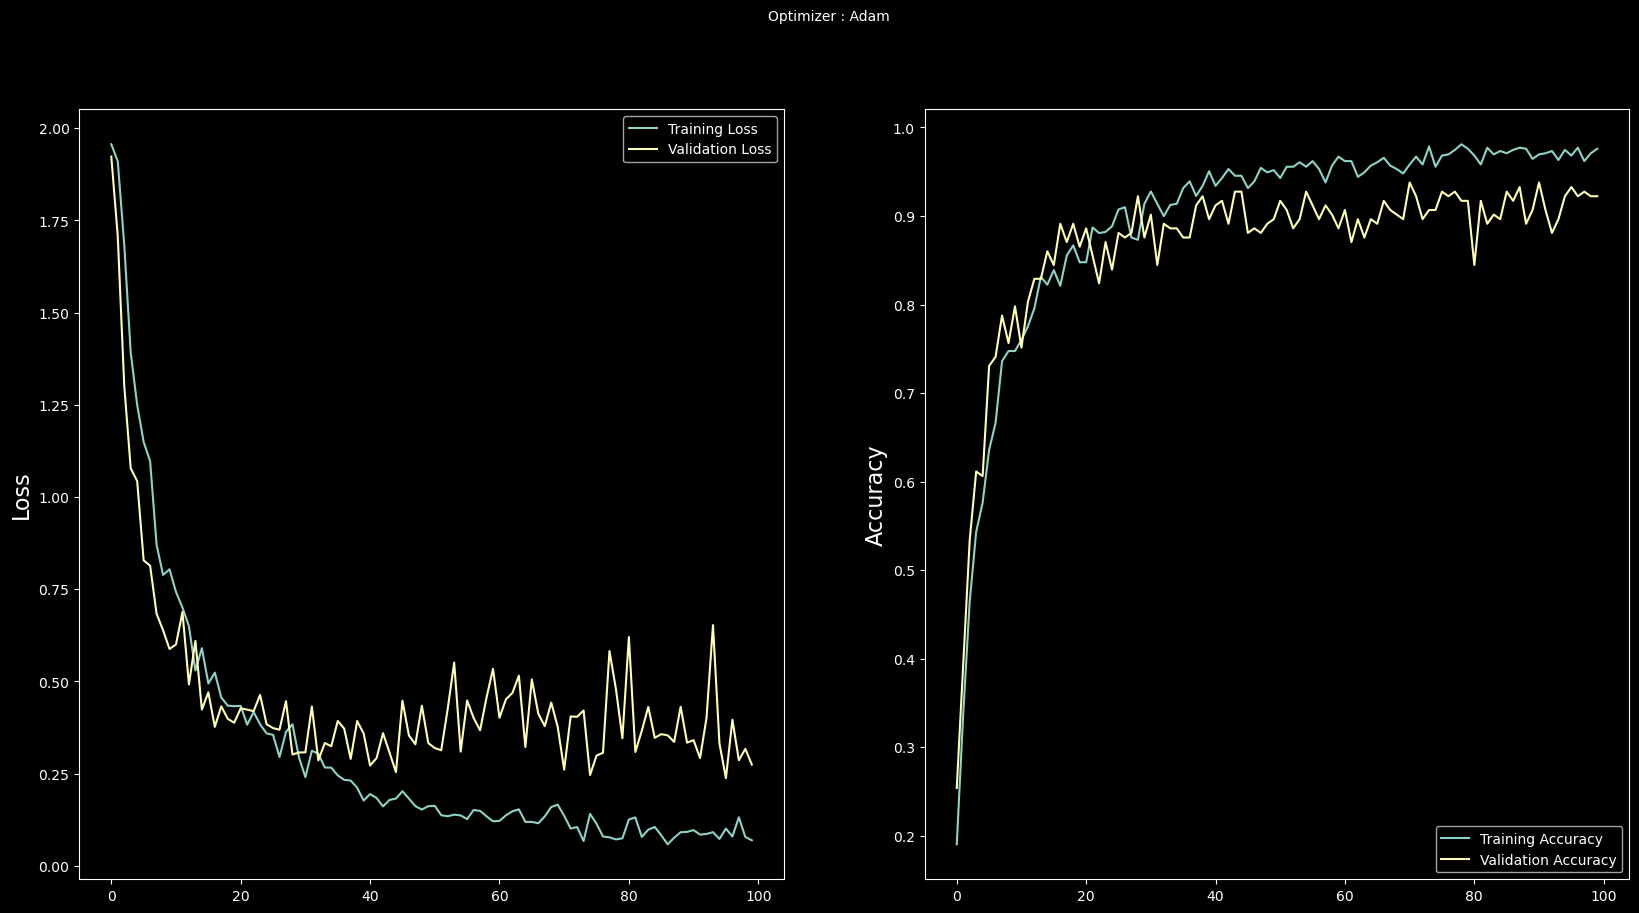

[1.9563149213790894, 1.909978985786438, 1.6836086511611938, 1.391657829284668, 1.249427318572998, 1.1491549015045166, 1.0971016883850098, 0.8701885938644409, 0.7885380387306213, 0.8037998080253601, 0.742146372795105, 0.6998865604400635, 0.6493078470230103, 0.5294490456581116, 0.5898926854133606, 0.49421796202659607, 0.523598849773407, 0.4560824930667877, 0.43400079011917114, 0.4326097071170807, 0.4333423972129822, 0.3823198676109314, 0.4166773557662964, 0.38339298963546753, 0.35873880982398987, 0.35498276352882385, 0.29478275775909424, 0.36291685700416565, 0.3833809494972229, 0.29412999749183655, 0.2401747703552246, 0.31175485253334045, 0.30375248193740845, 0.26645147800445557, 0.2657877802848816, 0.24506403505802155, 0.23288673162460327, 0.23080696165561676, 0.21157126128673553, 0.17671507596969604, 0.19428609311580658, 0.18373200297355652, 0.1608143001794815, 0.17831926047801971, 0.18215690553188324, 0.20198005437850952, 0.18212828040122986, 0.1614571511745453, 0.15231747925281525, 0

In [13]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()
print(history.history['loss'])
print(history.history['val_loss'])
print(history.history['accuracy'])
print(history.history['val_accuracy'])

1/1 [==============================] - 0s 25ms/step
[5.6972098e-01 9.4009386e-03 1.5906172e-02 3.7364042e-01 5.0159975e-05
 3.1279434e-02 1.8464028e-06]
Anger


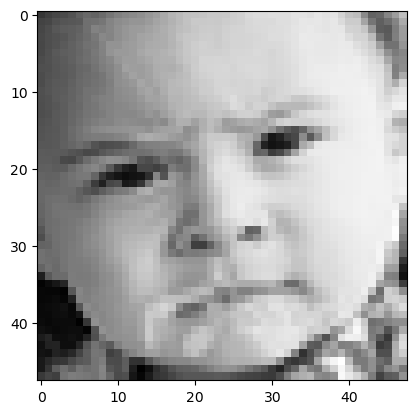

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
import cv2

# Pre-Processing test data same as train data.
img_width=256
img_height=256

def prepare(img_path):
    img = image.load_img(img_path)
    x = image.img_to_array(img)
    x = cv2.resize(x,(64,64))
    x = x/255
    return np.expand_dims(x, axis=0)



result = loaded_model.predict([prepare('Emotions2/data/val/Angry/29325.png')])
Animal=image.load_img('Emotions2/data/val/Angry/29325.png')
plt.imshow(Animal)

classes_x=np.argmax(result,axis=1)

print(result[0])

if classes_x[0] == 0:
    print("Anger")
elif classes_x[0] == 1:
    print("Contempt")
elif classes_x[0] == 2:
    print("Disgust")
elif classes_x[0] == 3:
    print("Fear")
elif classes_x[0] == 4:
    print("Happiness")
elif classes_x[0] == 5:
    print("Sadness")
else:
    print("Surprised")

In [ ]:
# -------------------------------------------- FROM ON DOWNWARDS, IT'S ALL TRASH ---------------------------------------------
################################################################################################################################
################################################################################################################################
################################################################################################################################
################################################################################################################################
################################################################################################################################
################################################################################################################################
################################################################################################################################

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay

num_classes = 7
img_size = (64, 64)
batch_size = 32
data_dir = "Emotions3/data/train"

# Create a data generator with augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Rotate images up to 20 degrees
    width_shift_range=0.2,  # Shift width by a fraction of total width
    height_shift_range=0.2,  # Shift height by a fraction of total height
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% training, 20% validation
)

# Load and preprocess the training set
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load and preprocess the validation set
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Calculate class weights to handle imbalance
class_weights = {}
total_samples = train_generator.samples
for class_index in range(num_classes):
    class_count = sum(train_generator.classes == class_index)
    class_weight = total_samples / (num_classes * class_count)
    class_weights[class_index] = class_weight

# Build the sequential model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))  # Increase the number of neurons
model.add(layers.Dropout(0.3))  # Adjust dropout rate
model.add(layers.Dense(num_classes, activation='softmax'))

# Define an exponential decay for the learning rate
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model with class weights and the specified optimizer
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define a ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint("best_model", monitor='val_accuracy', save_best_only=True, mode='max')

# Define an EarlyStopping callback to stop training if there's no improvement
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Train the model with class weights, learning rate decay, and early stopping
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=[checkpoint, early_stopping]
)


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay, CosineDecay

num_classes = 7
img_size = (64, 64)
batch_size = 32
data_dir = "Best_Emotion/CK+48"

# Create a data generator with augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load and preprocess the training set
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load and preprocess the validation set
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Calculate class weights to handle imbalance
class_weights = {}
total_samples = train_generator.samples
for class_index in range(num_classes):
    class_count = sum(train_generator.classes == class_index)
    class_weight = total_samples / (num_classes * class_count)
    class_weights[class_index] = class_weight

# Build the sequential model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.BatchNormalization())  # Batch Normalization
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())  # Batch Normalization
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())  # Batch Normalization
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))  # Adjust dropout rate
model.add(layers.Dense(num_classes, activation='softmax'))

# Define an exponential decay for the learning rate
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model with class weights and the specified optimizer
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define a ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint("best_model", monitor='val_accuracy', save_best_only=True, mode='max')

# Define an EarlyStopping callback to stop training if there's no improvement
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Train the model with class weights, learning rate decay, and early stopping
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=[checkpoint, early_stopping]
)


Found 788 images belonging to 7 classes.
Found 193 images belonging to 7 classes.
Epoch 1/100
25/25 [==============================] - ETA: 0s - loss: 3.6435 - accuracy: 0.1954INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


25/25 [==============================] - 19s 686ms/step - loss: 3.6435 - accuracy: 0.1954 - val_loss: 3.0420 - val_accuracy: 0.0829
Epoch 2/100
25/25 [==============================] - 3s 138ms/step - loss: 2.1013 - accuracy: 0.2183 - val_loss: 7.8850 - val_accuracy: 0.0518
Epoch 3/100
25/25 [==============================] - 4s 142ms/step - loss: 2.0044 - accuracy: 0.2157 - val_loss: 13.7770 - val_accuracy: 0.0518
Epoch 4/100
25/25 [==============================] - 4s 149ms/step - loss: 1.8456 - accuracy: 0.2703 - val_loss: 14.6048 - val_accuracy: 0.0518
Epoch 5/100
25/25 [==============================] - 3s 138ms/step - loss: 1.8325 - accuracy: 0.2970 - val_loss: 14.4731 - val_accuracy: 0.0518
Epoch 6/100
25/25 [==============================] - 4s 145ms/step - loss: 1.8158 - accuracy: 0.2792 - val_loss: 15.8757 - val_accuracy: 0.0518
Epoch 7/100
25/25 [==============================] - 4s 141ms/step - loss: 1.7833 - accuracy: 0.3084 - val_loss: 11.0904 - val_accuracy: 0.0518
Epoch